In [101]:
# We used the boston dataset earlier in this chapter (OA 4.2). 
# At that time we were looking  for a single variable that could 
# help us best predict the variables of interest. 
#
# To be specific, we were interested in outcome variables NOX and MEDV. 
# Now we want to see if multiple variables could help us build a better model.  
#
# Identify two or three variables that can serve as the predictors 
# for NOX and build a linear regression model. Do the same for MEDV 
# as the dependent variable. 
#
# Hint: We already did  some correlation-based analysis to see which of the 
# variables could have most associations with the outcome variables. 
# Use that analysis to determine which of the two or three variables you 
# would use for regression. 

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

scikit_model = LinearRegression()

# Load and print dataset to ensure data is clean, numeric, and I know what columns are available
df = pd.read_csv('../Datasets/Code_and_Data_(Chapter_04)/Code and Data (Chapter 04)/Boston.csv', index_col=0)
# print (df)

# Now we will calculate the correlations to find the most highly correlated variables with 'nox'
correlations = {}

for i in range(len(df.columns)):
    correlations[df.columns[i]] = (np.corrcoef(df.iloc[:, i], df.nox)[0, 1])
    
correlations = dict(sorted(correlations.items(), key=lambda x: x[1]))

for key, value in correlations.items():
    print(f"Correlation coefficient between '{key:<7}' and 'nox': {value:.2f}")

Correlation coefficient between 'dis    ' and 'nox': -0.77
Correlation coefficient between 'zn     ' and 'nox': -0.52
Correlation coefficient between 'medv   ' and 'nox': -0.43
Correlation coefficient between 'black  ' and 'nox': -0.38
Correlation coefficient between 'rm     ' and 'nox': -0.30
Correlation coefficient between 'chas   ' and 'nox': 0.09
Correlation coefficient between 'ptratio' and 'nox': 0.19
Correlation coefficient between 'crim   ' and 'nox': 0.42
Correlation coefficient between 'lstat  ' and 'nox': 0.59
Correlation coefficient between 'rad    ' and 'nox': 0.61
Correlation coefficient between 'tax    ' and 'nox': 0.67
Correlation coefficient between 'age    ' and 'nox': 0.73
Correlation coefficient between 'indus  ' and 'nox': 0.76
Correlation coefficient between 'nox    ' and 'nox': 1.00


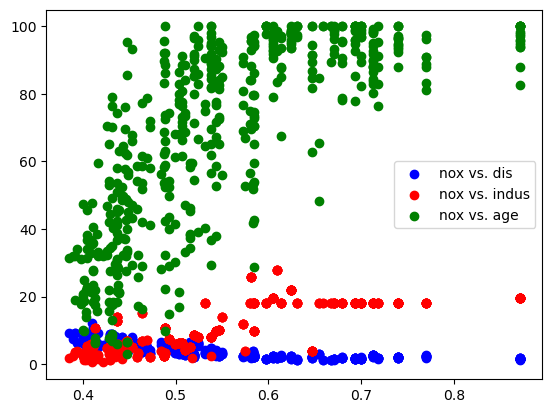

In [103]:
# We can see that the highest correlations are age, indus, and dis. The variables represent:
#    age   – proportion of owner-occupied units built prior to  1940  
#    dis   – weighted distances to five Boston employment centers  
#    indus – proportion of non-retail business acres per town  
#    nox   – nitric oxides concentration (parts per 10 million)  

plt.figure(1)
plt.scatter(df.nox, df.dis, color="blue", label="nox vs. dis") # Negative correlation, inverse relationship
plt.scatter(df.nox, df.indus, color="red", label="nox vs. indus")
plt.scatter(df.nox, df.age, color="green", label="nox vs. age")
plt.legend()

# This visualization displays the degree to which the variables are correlated:
#
#   dis   = -.77
#   indus =  .76
#   age   =  .73
#
# As we can see from the plot, 'dis' is more tightly coupled with 'nox', and 'age' is less tightly coupled.
#
# In this case, it may be best to exclude 'age', as it is shown to stray from 'nox' quite a bit. Experimentation
# with the regression model can investigate the effects of keeping or removing the variable.
#
# Furthermore, the plot demonstrates the negative correlation 'dis' has with 'nox'.

In [104]:
# Let us build the multiple linear regression model to predict the value of 'nox' using variables
# 'dis' and 'indus', the two highest correlations, only.

y = df.nox
X = df[['indus', 'dis']]
X = sm.add_constant(X)

lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

# Calculate MSE with scikit
scikit_model.fit(X, y)

predictions = scikit_model.predict(X)
squared_errors = [(actual - predicted)**2 for actual, predicted in zip(y, predictions)]
mse = sum(squared_errors) / len(squared_errors)
print("\n\nMean Squared Error:", mse)

# This model turns out to have a very close R-squared and Adj. R-squared, meaning it is a good model.
# It also has a low condition number (important for later).

                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     554.3
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          6.52e-128
Time:                        11:54:26   Log-Likelihood:                 667.66
No. Observations:                 506   AIC:                            -1329.
Df Residuals:                     503   BIC:                            -1317.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5678      0.013     42.821      0.0

In [105]:
# Now let us build the multiple linear regression model to predict the value of 'nox' using variables
# 'dis', 'indus', and 'age' (top three highest correlated variables) to evaluate the effect.

y = df.nox
X = df[['indus', 'dis', 'age']]
X = sm.add_constant(X)

lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

# Calculate MSE with scikit
scikit_model.fit(X, y)

predictions = scikit_model.predict(X)
squared_errors = [(actual - predicted)**2 for actual, predicted in zip(y, predictions)]
mse = sum(squared_errors) / len(squared_errors)
print("\n\nMean Squared Error:", mse)

# This model has a higher R-squared and still very close Adj. R-squared. Even better than the last model.
# However, the condition number jumped quite a lot, meaning adding the age variable introduced some
# instability, probably in the form of multicollinearity.

                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     419.4
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          2.62e-136
Time:                        11:54:26   Log-Likelihood:                 690.48
No. Observations:                 506   AIC:                            -1373.
Df Residuals:                     502   BIC:                            -1356.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4758      0.018     25.818      0.0

In [106]:
# Now let us build the multiple linear regression model to predict the value of 'nox' using 
# all the variables, just to observe the effect.

y = df.nox
X = df[['indus', 'dis', 'age', 'crim', 'zn', 'chas', 'rm', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']]
X = sm.add_constant(X)

lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

# This model has the highest R-squared, but also the largest gap from R-squared to Adj. R-squared.
# Furthermore, the condition number is extrememly high, indicating a volatile model. In the next model,
# I will elminate non-significant variables (variables with high p-values) in an attempt to refine the model.

                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     135.8
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          2.53e-153
Time:                        11:54:26   Log-Likelihood:                 758.43
No. Observations:                 506   AIC:                            -1489.
Df Residuals:                     492   BIC:                            -1430.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7851      0.051     15.448      0.0

In [107]:
# Using the data collected from the above MLR model analysis, let's eliminate non-significant
# variables 'zn', 'chas', 'tax', 'black', 'rm', and 'lstat'. I am basing this decision off of 
# the p-values of the variables, found in the 'P>|t|' column.

y = df.nox
X = df[['indus', 'dis', 'age', 'crim', 'rad', 'ptratio', 'medv']]
X = sm.add_constant(X)

lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

# This model has the highest R-squared and a small gap between R-sqaured and Adj. R-squared, meaning it
# is a very good model. However, the condition number is still very high, so I will investigate that next.

                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     252.8
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          1.90e-159
Time:                        11:54:26   Log-Likelihood:                 756.58
No. Observations:                 506   AIC:                            -1497.
Df Residuals:                     498   BIC:                            -1463.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7750      0.035     22.150      0.0

In [108]:
# To investigate the high condition number since this model has a much higher R-squared and seems promising, 
# we will perform VIF (variance ingflation factor) analysis to investigate multicollinearity

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# VIF values can be interpreted as follows:
#
# 1-2: Little multicollinearity with other independent variables (Acceptable)
# 2-5: Moderate multicollinearity with other independent variables (Not necessarily problematic)
# 5 +: High multicollinearity with other independent variables (Reevaluate model)
#
# Since the consant value is not a true independent value, and the rest of the values are roughly ~ < 3,
# the model should be acceptable for use...

  Variable         VIF
0    const  207.173213
1    indus    2.838750
2      dis    3.080308
3      age    2.535783
4     crim    1.759631
5      rad    2.353934
6  ptratio    1.541577
7     medv    1.749296


Residuals Plot


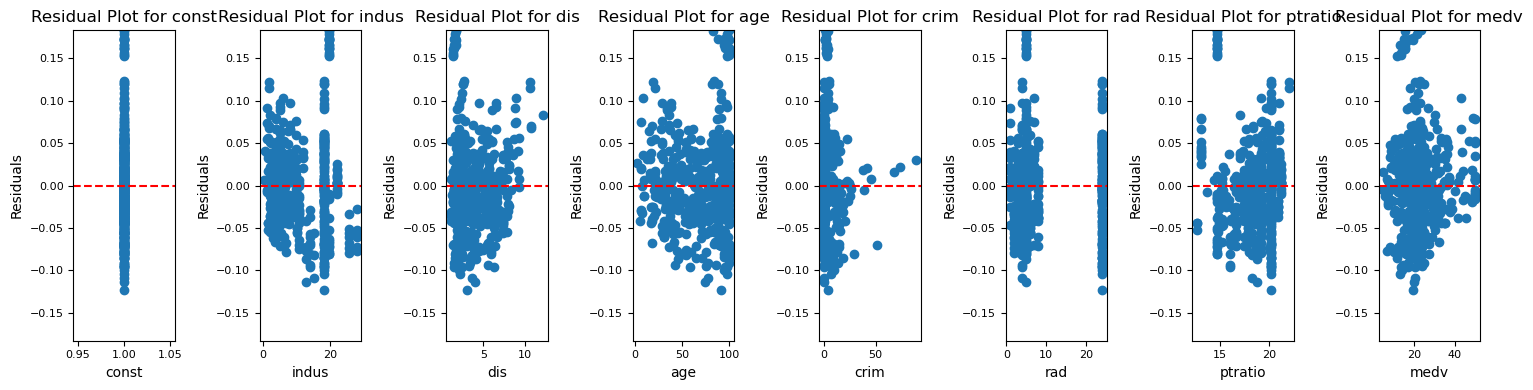




Leverage Plot


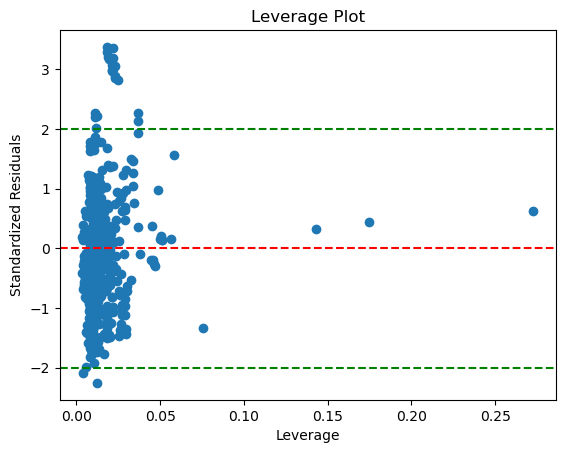




Correlation Matrix
            indus       dis       age      crim       rad   ptratio      medv
indus    1.000000 -0.708027  0.644779  0.406583  0.595129  0.383248 -0.483725
dis     -0.708027  1.000000 -0.747881 -0.379670 -0.494588 -0.232471  0.249929
age      0.644779 -0.747881  1.000000  0.352734  0.456022  0.261515 -0.376955
crim     0.406583 -0.379670  0.352734  1.000000  0.625505  0.289946 -0.388305
rad      0.595129 -0.494588  0.456022  0.625505  1.000000  0.464741 -0.381626
ptratio  0.383248 -0.232471  0.261515  0.289946  0.464741  1.000000 -0.507787
medv    -0.483725  0.249929 -0.376955 -0.388305 -0.381626 -0.507787  1.000000



MSE
Mean Squared Error: 0.0029430031385367667


In [109]:
# However, the condition number is still high, so I will perform other testing in
# an attempt to find the cause. The cause, again, is typically high multicollinearity.

# Starting with using residual and leverage plot to examine potential outliers:
residuals = lr_model.resid
leverage = lr_model.get_influence().hat_matrix_diag
standardized_residuals = lr_model.get_influence().resid_studentized_internal

# Residuals plot
print("Residuals Plot")
num_cols = X.shape[1]
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(15, 4))

for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], residuals)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Residuals')
    axes[i].axhline(y=0, color='r', linestyle='--')
    axes[i].set_title(f'Residual Plot for {col}')
    axes[i].set_ylim(-max(abs(residuals)), max(abs(residuals)))  
    axes[i].tick_params(labelsize=8) 

plt.tight_layout()
plt.show()

# Leverage plot
print("\n\n\nLeverage Plot")
plt.scatter(leverage, standardized_residuals)
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Leverage Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=2, color='g', linestyle='--')
plt.axhline(y=-2, color='g', linestyle='--')
plt.show()

# Correlation matrix 
print("\n\n\nCorrelation Matrix")
selected_columns = ['indus', 'dis', 'age', 'crim', 'rad', 'ptratio', 'medv']
correlation_matrix = df[selected_columns].corr()
print(correlation_matrix)

# Checking MSE using scikit
print("\n\n\nMSE")
scikit_model.fit(X, y)

predictions = scikit_model.predict(X)
squared_errors = [(actual - predicted)**2 for actual, predicted in zip(y, predictions)]
mse = sum(squared_errors) / len(squared_errors)
print("Mean Squared Error:", mse)

In [110]:
# Given all of the above analysis, I will try a remedial action of removing the 'age' variable.
# I am doing so due to the high correlation between age and both 'indus' and 'dis' (multicollinearity) found in
# the correlation matrix. I hypothesize that removing this variable will address some of the multicollinearity issue.

y = df.nox
X = df[['indus', 'dis', 'rad', 'crim', 'ptratio', 'medv']]
X = sm.add_constant(X)

lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

# Checking MSE using scikit
scikit_model.fit(X, y)

predictions = scikit_model.predict(X)
squared_errors = [(actual - predicted)**2 for actual, predicted in zip(y, predictions)]
mse = sum(squared_errors) / len(squared_errors)
print("\n\nMean Squared Error:", mse)

# This changed reduced the condition number by 735, which is a significant improvement. The R-squared
# dropped by .17 from the previous model, which is unfortunate but the model is now much more robust. 
# It is possible the higher R-squared before was from the underlying issues anyway. If I were to revisit this model
# in the future, I would investigate the residuals plots for 'crim' and 'rad', and look into PCA to reduce
# dimensionality and address multicollinearity without having to remove feature variables.
#
# Comparing the three best models I created, it seems the analysis and remedial action taken
# did improve the overall model, compared to deciding the feature set based only on initial
# correlation between potential X's and y.
#
# Model 1:
#
#    Feature Set:      X = df[['indus', 'dis']]
#    R-squared:        0.688
#    Adj. R-squared:   0.687
#    Condition number: 62.0
#    MSE:              0.004182465680109204
#
# Model 2:
#
#    Feature Set:      X = df[['indus', 'dis', 'age']]
#    R-squared:        0.715
#    Adj. R-squared:   0.713 
#    Condition number: 505
#    MSE:              0.0038218100029010433
#
# Model 3 (This one):
#
#    Feature Set:      X = df[['indus', 'dis', 'rad', 'crim', 'ptratio', 'medv']]
#    R-squared:        0.763 
#    Adj. R-squared:   0.760
#    Condition number: 435
#    MSE:              0.003176654072565487

                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     267.7
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          1.92e-152
Time:                        11:54:31   Log-Likelihood:                 737.25
No. Observations:                 506   AIC:                            -1461.
Df Residuals:                     499   BIC:                            -1431.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8709      0.033     26.648      0.0

In [111]:
##################
#   MEDV MODEL   #
##################

# Now I will make a much more brief MLR model for the 'medv' variable as asked.
# Again I will calculate the correlations to find the most highly correlated variables with 'medv'
correlations = {}

for i in range(len(df.columns)):
    correlations[df.columns[i]] = (np.corrcoef(df.iloc[:, i], df.medv)[0, 1])
    
correlations = dict(sorted(correlations.items(), key=lambda x: x[1]))

for key, value in correlations.items():
    print(f"Correlation coefficient between '{key:<7}' and 'medv': {value:.2f}")

Correlation coefficient between 'lstat  ' and 'medv': -0.74
Correlation coefficient between 'ptratio' and 'medv': -0.51
Correlation coefficient between 'indus  ' and 'medv': -0.48
Correlation coefficient between 'tax    ' and 'medv': -0.47
Correlation coefficient between 'nox    ' and 'medv': -0.43
Correlation coefficient between 'crim   ' and 'medv': -0.39
Correlation coefficient between 'rad    ' and 'medv': -0.38
Correlation coefficient between 'age    ' and 'medv': -0.38
Correlation coefficient between 'chas   ' and 'medv': 0.18
Correlation coefficient between 'dis    ' and 'medv': 0.25
Correlation coefficient between 'black  ' and 'medv': 0.33
Correlation coefficient between 'zn     ' and 'medv': 0.36
Correlation coefficient between 'rm     ' and 'medv': 0.70
Correlation coefficient between 'medv   ' and 'medv': 1.00


In [112]:
# It seems to two highest correlations are with 'lstat' and 'rm', the rest seem weak.
# Therefore I will build my MLR model with these two variables in my feature set.

y = df.medv
X = df[['lstat', 'rm']]
X = sm.add_constant(X)

lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

# I will not do all the further analysis I did on the previous model for the sake of time and 
# scope of the assignment.

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          7.01e-112
Time:                        11:54:31   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.6